<a href="https://colab.research.google.com/github/panzershracker/Optimization-methods/blob/master/HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Методы оптимизации. 1 урок. Евдокимов Алексей

# Задание

В проектируемой локальной сети есть заданное количество компьютеров.
Есть расстояния от каждого компьютера до сервера и до остальных компьютеров. Маршрутизаторы соединяются с сервером через оптоволокно стоимостью 12 р/м, а компьютеры - с маршрутизаторами соединяются через витую пару стоимостью 30 р/м.
Каждый маршрутизатор имеет 8 портов для витой пары и один оптический порт.
Сервер имеет неограниченное число оптических портов и портов для витой пары. Компьютер может соединяться с сервером напрямую или через маршрутизатор.
1. Построить ЦФ для расчёта стоимости оборудования ЛВС в общем виде. Учесть стоимость маршрутизатора, обоснованность его установки.
2. Построить поверхность стоимости от сумм расстояний для конкретного примера. Количество компьютеров — больше двух, располагаются не на одной линии в одной четверти относительно сервера.*

In [236]:
import matplotlib.pyplot as plt
import numpy as np


In [237]:
price_opt = 12
price_twp = 30
price_router = 1000

In [238]:
server_cord = (0,0)
all_comp_x = [np.random.randint(5,25) for i in range(3)]
all_comp_y = [np.random.randint(5,25) for i in range(3)]

In [239]:
all_comp_x, all_comp_y

([21, 17, 7], [10, 5, 24])

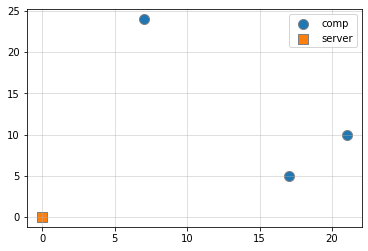

In [240]:
plt.scatter(all_comp_x, all_comp_y, label='comp', marker='o', s=100, edgecolors='gray')
plt.scatter(server_cord[0], server_cord[1], label='server', marker='s', s=120, edgecolors='gray')

plt.grid(alpha=.5)
plt.legend()
plt.show()

In [241]:
# Расчитаем стоимость оптоволокна, для варианта где мы не используем роутер.

all_comp_opt_price = 0

for x,y in zip(all_comp_x, all_comp_y):
  len_ = np.sqrt((x - 0)**2 + (y - 0)**2)
  all_comp_opt_price += len_ * price_opt

print(f'Цена подключения всех компьютеров через оптоволокно напрямую к серверу = {np.sum(all_comp_opt_price).round(2)}')

Цена подключения всех компьютеров через оптоволокно напрямую к серверу = 791.75


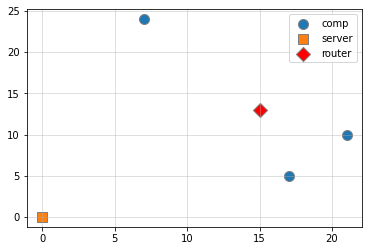

In [242]:
# найдем центроид среди компьютеров, тк выгоднее минимизировать расстояние
# роутера до компьютеров

router_xy = (np.sum(all_comp_x) / len(all_comp_x),
             np.sum(all_comp_y) / len(all_comp_y))

plt.scatter(all_comp_x, all_comp_y, label='comp', marker='o', s=100, edgecolors='gray')
plt.scatter(server_cord[0], server_cord[1], label='server', marker='s', s=120, edgecolors='gray')
plt.scatter(router_xy[0], router_xy[1], c='r', s=100, marker='D', label='router', edgecolors='gray')

plt.grid(alpha=.5)
plt.legend()
plt.show()

In [243]:
# расчитаем стоимость подключения через роутер при том что он является центроидом компьютеров

price_with_router = price_router

for x,y in zip(all_comp_x, all_comp_y):
  len_ = np.sqrt((router_xy[0] - x)**2 + (router_xy[1] - y)**2)
  price_with_router += len_ * price_twp

server_to_router_price = np.sqrt(router_xy[0]**2 + router_xy[1]**2)  *  price_opt

print(f'цена подключения вместе с роутером на месте центроида = {(server_to_router_price + price_with_router).round(2)}')

цена подключения вместе с роутером = 2094.87


In [245]:
# Мне стало лень каждый раз писать формулу

def p2p(x1,x2,y1,y2):
  return np.sqrt((x1 - x2)**2  +  (y1 - y2)**2)

In [246]:
# Расчитаем итеративно поверхность ошибки.

X, Y = np.arange(1, 26, 1), np.arange(1, 26, 1)

err = []

for x1 in X:
  for y1 in Y:
    cost = 0
    for x2, y2 in zip(all_comp_x, all_comp_y):

      _ = p2p(x1,x2,y1,y2) * price_twp
      cost += _
    
    opt = p2p(x1,server_cord[0], y1, server_cord[1])
    err.append((cost + price_router + opt).round(2))

In [247]:
err = np.array(err)
err = err.reshape(25, 25)

In [248]:
import seaborn as sns

In [297]:
# определим 25 минимальных значений
sorted_ = np.sort(err.flatten())

mins_xy = [],[]

for i in sorted_[:25]:
  idx = np.where(err == i)
  mins_xy[0].append(idx[0][0])
  mins_xy[1].append(idx[1][0])

best_price = sorted_[0]

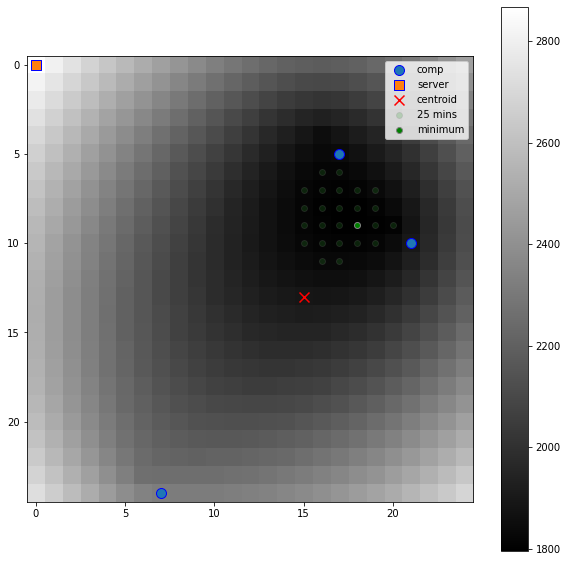

In [296]:
plt.figure(figsize=(10,10))

plt.scatter(all_comp_x, all_comp_y, label='comp', marker='o', s=100, edgecolors='b')
plt.scatter(server_cord[0], server_cord[1], label='server', marker='s', s=120, edgecolors='b')
plt.scatter(router_xy[0], router_xy[1], c='r', s=100, marker='x', label='centroid', edgecolors='w')

# Выделим область с К сегментов с минимальной стоимостью для отображения
plt.scatter(mins_xy[0], mins_xy[1], alpha=.2, label='25 mins', edgecolors='gray')
plt.scatter(mins_xy[0][0], mins_xy[1][0], label='minimum', edgecolors='gray', c='g')
plt.imshow(err.T, cmap='gray')

plt.legend(loc='best')
plt.colorbar()
plt.show()

#! Как видно из расчетов - центроид - не самый выгодный вариант.
# ярко зеленая точка - минимум ошибки => наименьшая цена из возможных вариантов.

In [277]:
import plotly.graph_objects as go
import plotly.express as px

In [300]:
fig = go.Figure(data=[go.Surface(z=err, colorscale='Gray')])

fig.show()

# Итог:

In [301]:
print(f'Цена подключения всех компьютеров через оптоволокно напрямую к серверу = {np.sum(all_comp_opt_price).round(2)}')
print(f'Цена при оптимальном расположении роутера = {best_price}')
print(f'цена подключения вместе с роутером на месте центроида = {(server_to_router_price + price_with_router).round(2)}')

Цена подключения всех компьютеров через оптоволокно напрямую к серверу = 791.75
Цена при оптимальном расположении роутера = 1796.2
цена подключения вместе с роутером на месте центроида = 2094.87
